In [1]:
import seaborn as sns

In [64]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [13]:
v= pd.read_csv("C:/Users/m4r1c/Documents/GitHub/Mineria_datos/winemag-data_first150k.csv", encoding="utf8")

In [13]:
v= pd.read_csv("C:/Users/m4r1c/Documents/GitHub/Mineria_datos/winemag-data_first150k.csv", encoding="utf8")

In [46]:
v

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [20]:
v2=v.drop(['description', 'designation', 'Unnamed: 0', 'region_1','price','province','region_2','variety'], axis=1, inplace = False)

In [47]:
#Limpiamos la base de datos y dejamos unicamente las columnas que vamos a utilizar
v2

,País,Calificación,Marca
0,US,96,Heitz
1,Spain,96,Bodega Carmen Rodríguez
2,US,96,Macauley
3,US,96,Ponzi
4,France,95,Domaine de la Bégude
...,...,...,...
150925,Italy,91,Feudi di San Gregorio
150926,France,91,H.Germain
150927,Italy,91,Terredora
150928,France,90,Gosset


In [23]:
v2.isnull().sum()
#verificamos los datos inusales y los eliminamos

country    5
points     0
winery     0
dtype: int64

In [26]:
v2=v2.dropna()
v2

,country,points,winery
0,US,96,Heitz
1,Spain,96,Bodega Carmen Rodríguez
2,US,96,Macauley
3,US,96,Ponzi
4,France,95,Domaine de la Bégude
...,...,...,...
150925,Italy,91,Feudi di San Gregorio
150926,France,91,H.Germain
150927,Italy,91,Terredora
150928,France,90,Gosset


In [28]:
v2.isnull().sum()

country    0
points     0
winery     0
dtype: int64

In [54]:
v2=v2.rename(columns = {'country':'País','winery':'Marca','points':'Calificación'})
v2
#cambiamos los nombres de la base para poderla trabajar mejor


,País,Calificación,Marca
0,US,96,Heitz
1,Spain,96,Bodega Carmen Rodríguez
2,US,96,Macauley
3,US,96,Ponzi
4,France,95,Domaine de la Bégude
...,...,...,...
150925,Italy,91,Feudi di San Gregorio
150926,France,91,H.Germain
150927,Italy,91,Terredora
150928,France,90,Gosset


In [60]:
#ya con la base limpia empezamos a trabajar con ella 
v2["Calificación"].mean()

87.88852741427861

In [57]:
v2["Calificación"].var()

10.383150361887717

In [58]:
v2["Calificación"].min()

80

In [59]:
v2["Calificación"].max()

100

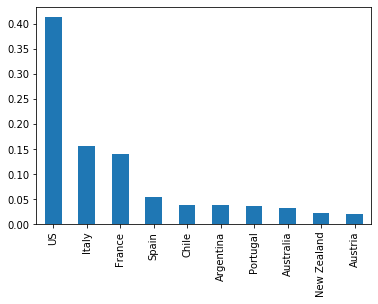

In [67]:
(v2['País'].value_counts().head(10)/len(v2)).plot.bar()

In [68]:
#En la grafica podemos observar que la mayor cantidad de datos se concentra en estados unidos

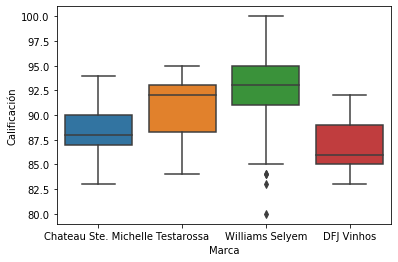

In [72]:
v2 = v2[v2.Marca.isin(v2.Marca.value_counts().head(4).index)]
sns.boxplot(x='Marca',y='Calificación',data=v2)

In [73]:
#En esta grafca vemos la concentracion de los datos por marca en que califiacion esta 

In [80]:
US=v2[v2.País=='US']

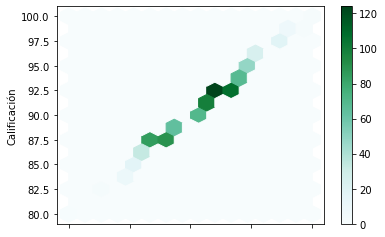

In [93]:
US.plot.hexbin(x='Calificación',y='Calificación', gridsize=15)